In [ ]:
#imports
import lightning as L
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import wandb
from lightning.pytorch import Trainer
from lightning.pytorch.loggers import WandbLogger

from mini_latent_pd import FlowMatching, FlowMatchingCFG
from mini_latent_pd.data.MNIST_datamodule import MNISTDataModule
from mini_latent_pd.data.moons_datamodule import MoonsDataModule
from mini_latent_pd.models.mlp import MoonsNet
from mini_latent_pd.models.unet import UNet
from mini_latent_pd.modules.schedulers import LinearScheduler
from mini_latent_pd.modules.samplers import GaussianSampler
from mini_latent_pd.modules.solvers import EulerSolver
from mini_latent_pd.util.plot_imgs import show_imgs


In [4]:
moons_dm = MoonsDataModule()

# --- Train Flow Matching Model ---
print("Training Flow Matching Model")
flow_model_moons = MoonsNet()
flow_model = FlowMatching(
    model=flow_model_moons,
    alpha_beta_scheduler=LinearScheduler(data_dim=2),
    sampler=GaussianSampler(target_shape=(2,)),
)
flow_trainer = Trainer(
    max_epochs=7,
    accelerator="auto",
    devices="auto",
    log_every_n_steps=50,
)
flow_trainer.fit(flow_model, moons_dm)
generated_samples = flow_model.generate_samples(steps=50, labels=[0, 1])
print(generated_samples)
print("Flow Matching Model training complete.")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name                 | Type            | Params | Mode  | FLOPs
-------------------------------------------------------------------------
0 | model           

Training Flow Matching Model
Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:434: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=13` in the `DataLoader` to improve performance.


/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=13` in the `DataLoader` to improve performance.
/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:317: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 6: 100%|██████████| 20/20 [00:00<00:00, 94.89it/s, v_num=0, train/flow_matching_loss_step=0.827, val/flow_matching_loss=0.873, train/flow_matching_loss_epoch=0.885] 

`Trainer.fit` stopped: `max_epochs=7` reached.


Epoch 6: 100%|██████████| 20/20 [00:00<00:00, 89.51it/s, v_num=0, train/flow_matching_loss_step=0.827, val/flow_matching_loss=0.873, train/flow_matching_loss_epoch=0.885]

tensor([[-0.2205,  0.7312],
        [ 0.0429,  0.0604]])
Flow Matching Model training complete.


In [5]:
moons_dm = MoonsDataModule()

# --- Train Flow Matching Model ---
print("Training Flow Matching Model")
flow_model_moons = MoonsNet()
flow_model_cfg = FlowMatchingCFG(
    model=flow_model_moons,
    num_classes=2,
    alpha_beta_scheduler=LinearScheduler(data_dim=2),
    sampler=GaussianSampler(target_shape=(2,)),
)
flow_trainer = Trainer(
    max_epochs=17,
    accelerator="auto",
    devices="auto",
    log_every_n_steps=50,
)
flow_trainer.fit(flow_model_cfg, moons_dm)
generated_samples = flow_model_cfg.generate_samples(steps=50, labels=[0, 1], guidance_scale=3.0)
print(generated_samples)
print("Flow Matching Model training complete.")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name                 | Type            | Params | Mode  | FLOPs
-------------------------------------------------------------------------
0 | model                | MoonsNet        | 4.0 K  | train | 0    
1 | alpha_beta_scheduler | LinearScheduler | 0      | train | 0    
2 | sampler              | GaussianSampler | 0      | train | 0    
3 | ode_solver           | EulerSolver     | 0      | train | 0    
-------------------------------------------------------------------------
4.0 K     Trainable params
0         Non-trainable params
4.0 K     Total params
0.016     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode
0         Total Flops


Training Flow Matching Model
Epoch 16: 100%|██████████| 20/20 [00:00<00:00, 87.72it/s, v_num=1, train/flow_matching_loss_step=1.220, val/flow_matching_loss=1.220, train/flow_matching_loss_epoch=1.260]

`Trainer.fit` stopped: `max_epochs=17` reached.


Epoch 16: 100%|██████████| 20/20 [00:00<00:00, 82.79it/s, v_num=1, train/flow_matching_loss_step=1.220, val/flow_matching_loss=1.220, train/flow_matching_loss_epoch=1.260]

tensor([[-1.1337,  1.5725],
        [ 2.8732, -0.6493]])
Flow Matching Model training complete.


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Training Flow Matching Model


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.84MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 281kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.16MB/s]

  | Name                 | Type            | Params | Mode  | FLOPs
-------------------------------------------------------------------------
0 | model                | UNet            | 4.4 M  | train | 0    
1 | alpha_beta_scheduler | LinearScheduler | 0      | train | 0    
2 | sampler              | GaussianSampler | 0      | train | 0    
3 | ode_solver           | EulerSolver     | 0      | train | 0    
-------------------------------------------------------------------------
4.4 M     Trainable params
0         Non-trainable params
4.4 M     Total params
17.635    Total estimated model params size (MB)
70        Modules in train mode
0         Modules in eval mode
0         Total Flops


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:429: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:429: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 1: 100%|██████████| 430/430 [00:53<00:00,  7.98it/s, v_num=2, train/flow_matching_loss_step=0.248, val/flow_matching_loss=0.284, train/flow_matching_loss_epoch=0.290]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 430/430 [00:53<00:00,  7.97it/s, v_num=2, train/flow_matching_loss_step=0.248, val/flow_matching_loss=0.284, train/flow_matching_loss_epoch=0.290]


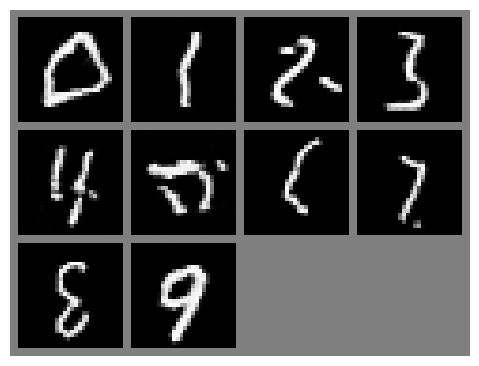

Flow Matching Model training complete.


In [6]:
mnist_dm = MNISTDataModule(num_workers=1)

# --- Train Flow Matching Model ---
print("Training Flow Matching Model")
flow_model_unet = UNet()
flow_model = FlowMatching(flow_model_unet)
flow_trainer = Trainer(max_epochs=2, accelerator="auto", devices="auto", log_every_n_steps=50)
flow_trainer.fit(flow_model, mnist_dm)
generated_samples = flow_model.generate_samples(labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], steps=50)
show_imgs(generated_samples)
print("Flow Matching Model training complete.")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name                 | Type            | Params | Mode  | FLOPs
-------------------------------------------------------------------------
0 | model                | UNet            | 4.4 M  | train | 0    
1 | alpha_beta_scheduler | LinearScheduler | 0      | train | 0    
2 | sampler              | GaussianSampler | 0      | train | 0    
3 | ode_solver           | EulerSolver     | 0      | train | 0    
-------------------------------------------------------------------------
4.4 M     Trainable params
0         Non-trainable params
4.4 M     Total params
17.635    Total estimated model params size (MB)
70        Modules in train mode
0         Modules in eval mode
0         Total Flops


Training Flow Matching Model
Epoch 1: 100%|██████████| 430/430 [00:55<00:00,  7.77it/s, v_num=3, train/flow_matching_loss_step=0.332, val/flow_matching_loss=0.307, train/flow_matching_loss_epoch=0.316]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 1: 100%|██████████| 430/430 [00:55<00:00,  7.76it/s, v_num=3, train/flow_matching_loss_step=0.332, val/flow_matching_loss=0.307, train/flow_matching_loss_epoch=0.316]


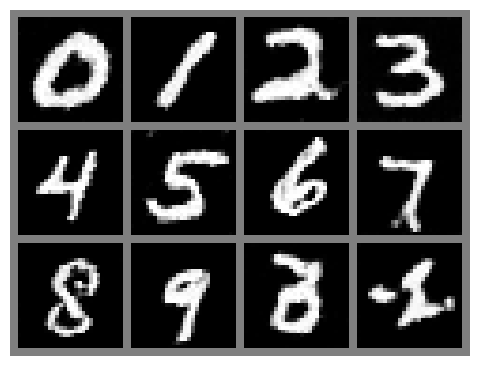

Flow Matching Model training complete.


In [7]:
mnist_dm = MNISTDataModule(num_workers=1)

# --- Train Flow Matching Model ---
print("Training Flow Matching Model")
flow_model_unet = UNet()
flow_model_cfg = FlowMatchingCFG(flow_model_unet)
flow_trainer = Trainer(max_epochs=2, accelerator="auto", devices="auto", log_every_n_steps=50)
flow_trainer.fit(flow_model_cfg, mnist_dm)
generated_samples = flow_model_cfg.generate_samples(
    labels=[
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        10,
    ],
    steps=50,
)
show_imgs(generated_samples)
print("Flow Matching Model training complete.")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Training Spatial VAE Model


┏━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name    ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ encoder │ SpatialEncoder │ 23.6 K │ train │     0 │
│ 1 │ decoder │ SpatialDecoder │ 30.5 K │ train │     0 │
└───┴─────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 54.1 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 54.1 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 25                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_conn
ector.py:429: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker 
initialization.

/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: 
UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be 
used.
  warnings.warn(warn_msg)

/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_conn
ector.py:429: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker 
initialization.

`Trainer.fit` stopped: `max_epochs=10` reached.


VAE training complete. Checkpoint saved at: /Users/moustholmes/mini_latent_pd/notebooks/lightning_logs/version_10/checkpoints/epoch=9-step=4300.ckpt
Original vs Reconstructed


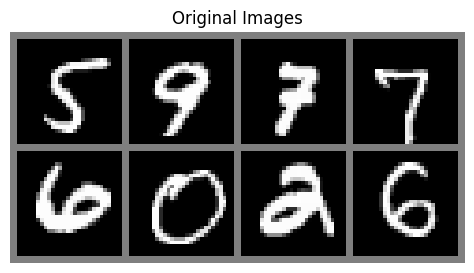

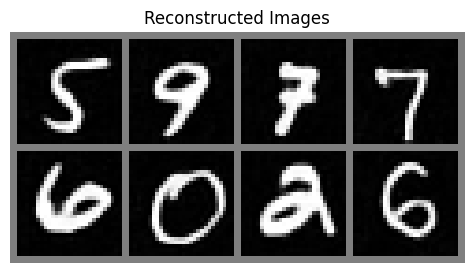

Calculated Scale Factor: 1.4278842210769653
Generating new digits from latent prior N(0, I)


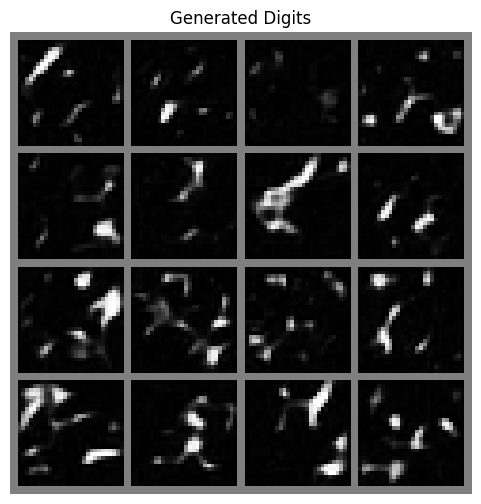

In [ ]:
from mini_latent_pd.vae_module import SpatialVAE
from mini_latent_pd.data.MNIST_datamodule import MNISTDataModule
from mini_latent_pd.util.plot_imgs import show_imgs
import torch
from lightning.pytorch import Trainer
import os

# --- Train VAE ---
print("Training Spatial VAE Model")
mnist_dm = MNISTDataModule(num_workers=1)

# Initialize SpatialVAE
# 4 latent channels, results in [B, 4, 7, 7] latent grid for 28x28 input
vae = SpatialVAE(in_channels=1, latent_channels=4, lr=1e-3)

vae_trainer = Trainer(
    max_epochs=10, 
    accelerator="auto", 
    devices="auto", 
    log_every_n_steps=50,
    default_root_dir="notebooks/lightning_logs_vae" # Separate dir to avoid confusion
)

vae_trainer.fit(vae, mnist_dm)
latest_vae_checkpoint = vae_trainer.checkpoint_callback.best_model_path
print(f"VAE training complete. Checkpoint saved at: {latest_vae_checkpoint}")

# --- Visualization ---
vae.eval()
val_batch = next(iter(mnist_dm.val_dataloader()))[0][:8].to(vae.device)

with torch.no_grad():
    reconstructions, mu, log_var = vae(val_batch)

print("Original vs Reconstructed")
# Interleave original and reconstructed for better comparison
show_imgs(val_batch, title="Original Images")
show_imgs(reconstructions, title="Reconstructed Images")

# Calculate scaling factor for LFM
vae.calculate_latent_stats(mnist_dm.train_dataloader())

# Generate new digits
print("Generating new digits from latent prior N(0, I)")
with torch.no_grad():
    # Sample from standard normal distribution with spatial shape
    z = torch.randn(16, 4, 7, 7, device=vae.device)
    generated_images = vae.decoder(z)

show_imgs(generated_images, title="Generated Digits")

In [7]:
checkpoint = torch.load("/Users/moustholmes/mini_latent_pd/outputs/2026-02-04/14-13-21/mini_latent_pd/0ygbfztp/checkpoints/last.ckpt", map_location="cpu")
state_dict = checkpoint.get("state_dict", checkpoint)  # Handle case where checkpoint is already a state_dict

In [9]:
print(state_dict.keys())

odict_keys(['scale_factor', 'encoder.conv1.0.weight', 'encoder.conv1.0.bias', 'encoder.conv1.1.weight', 'encoder.conv1.1.bias', 'encoder.conv1.1.running_mean', 'encoder.conv1.1.running_var', 'encoder.conv1.1.num_batches_tracked', 'encoder.conv2.0.weight', 'encoder.conv2.0.bias', 'encoder.conv2.1.weight', 'encoder.conv2.1.bias', 'encoder.conv2.1.running_mean', 'encoder.conv2.1.running_var', 'encoder.conv2.1.num_batches_tracked', 'encoder.conv_out.weight', 'encoder.conv_out.bias', 'decoder.conv_in.0.weight', 'decoder.conv_in.0.bias', 'decoder.up1.1.weight', 'decoder.up1.1.bias', 'decoder.up1.2.weight', 'decoder.up1.2.bias', 'decoder.up1.2.running_mean', 'decoder.up1.2.running_var', 'decoder.up1.2.num_batches_tracked', 'decoder.up2.1.weight', 'decoder.up2.1.bias', 'decoder.up2.2.weight', 'decoder.up2.2.bias', 'decoder.up2.2.running_mean', 'decoder.up2.2.running_var', 'decoder.up2.2.num_batches_tracked', 'decoder.final.weight', 'decoder.final.bias'])


/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'latent_processor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['latent_processor'])`.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores


Training Latent Flow Matching Model


┏━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name                 ┃ Type               ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model                │ MoonsNet           │  801 K │ train │     0 │
│ 1 │ alpha_beta_scheduler │ LinearScheduler    │      0 │ train │     0 │
│ 2 │ sampler              │ GaussianSampler    │      0 │ train │     0 │
│ 3 │ ode_solver           │ EulerSolver        │      0 │ train │     0 │
│ 4 │ latent_processor     │ AutoencoderWrapper │ 54.1 K │ train │     0 │
└───┴──────────────────────┴────────────────────┴────────┴───────┴───────┘

Trainable params: 855 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 855 K                                                                                                
Total estimated model params size (MB): 3                                                                          
Modules in train mode: 45                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_conn
ector.py:429: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker 
initialization.

/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: 
UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be 
used.
  warnings.warn(warn_msg)

/Users/moustholmes/mini_latent_pd/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_conn
ector.py:429: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker 
initialization.

`Trainer.fit` stopped: `max_epochs=10` reached.


Generating samples...


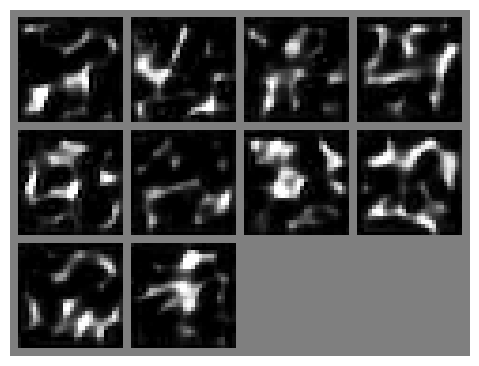

Latent Flow Matching Model training complete.


In [5]:
from mini_latent_pd import LatentFlowMatching, LatentFlowMatchingCFG
from mini_latent_pd.models.mlp import MoonsNet
from mini_latent_pd.modules.schedulers import LinearScheduler
from mini_latent_pd.modules.samplers import GaussianSampler
from mini_latent_pd.modules.latent_processors import AutoencoderWrapper
from mini_latent_pd.vae_module import SpatialVAE
from mini_latent_pd.data.MNIST_datamodule import MNISTDataModule
from lightning.pytorch import Trainer
from mini_latent_pd.util.plot_imgs import show_imgs

import os

print("Training Latent Flow Matching Model")

# Determine Checkpoint Path
vae_checkpoint = "/Users/moustholmes/mini_latent_pd/outputs/2026-02-04/14-13-21/mini_latent_pd/0ygbfztp/checkpoints/last.ckpt"
# Verify checkpoint
if not os.path.exists(vae_checkpoint):
    raise FileNotFoundError(f"Checkpoint not found at {vae_checkpoint}")

# Setup Latent Flow Matching
# Spatial VAE outputs [B, 4, 7, 7]
# Flattened dim = 4 * 7 * 7 = 196
latent_dim = 196 
latent_shape = (4, 7, 7)

# We use MoonsNet (MLP) for latent space flow matching
# It handles flattening internally if inputs are spatial
model_mlp = MoonsNet(
    input_dim=latent_dim, 
    output_dim=latent_dim, 
    hidden_dim=512, 
    time_dim=64, 
    num_classes=11 # 10 digits + 1 null
)

latent_processor = AutoencoderWrapper(
    autoencoder=SpatialVAE(),
    checkpoint_path=vae_checkpoint,
    scale_factor=1.0,
    freeze=False
    )

# New Cleaner API: Pass checkpoint path directly
latent_flow_model = LatentFlowMatchingCFG(
    model=model_mlp,
    latent_processor= latent_processor,
    alpha_beta_scheduler=LinearScheduler(data_dim=4), 
    sampler=GaussianSampler(target_shape=latent_shape),
    num_classes=10,
    guidance_scale=3.0
)

# Train
mnist_dm = MNISTDataModule(num_workers=1)
trainer = Trainer(max_epochs=10, accelerator="auto", devices="auto", log_every_n_steps=50)
trainer.fit(latent_flow_model, mnist_dm)

# Generate
print("Generating samples...")
generated_samples = latent_flow_model.generate_samples(
    labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
    steps=50, 
    guidance_scale=3.0
)
show_imgs(generated_samples)
print("Latent Flow Matching Model training complete.")